Labb 2 lets go.

Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

e) Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ak9_file_path = "ak9.xlsx"

def read_and_rename(sheet_name, path):
    df = pd.read_excel(path, sheet_name=sheet_name)
    df.columns = ['Place', 'Principal', 'Total (A-F)', 'Girls (A-F)', 'Boys (A-F)',
                  'Total (A-E)[%]', 'Girls (A-E)[%]', 'Boys (A-E)[%]',
                  'Total (points)[mean]', 'Girls (points)[mean]', 'Boys (points)[mean]']
    return df
df_math = read_and_rename('Matematik', ak9_file_path)
df_swedish = read_and_rename('Svenska', ak9_file_path)
df_english = read_and_rename('Engelska', ak9_file_path)
df_swedish2 = read_and_rename('Svenska som andraspråk', ak9_file_path)


print("Matematik:")
print(df_math.head())
print("\nSvenska:")
print(df_swedish.head())
print("\nEngelska:")
print(df_english.head())
print("\nSvenska som andraspråk:")
print(df_swedish2.head())

Matematik:
   Place   Principal  Total (A-F)  Girls (A-F)  Boys (A-F) Total (A-E)[%]  \
0  Riket    Samtliga       106766        51548       55218           89.1   
1  Riket    Kommunal        84163        40386       43777           88.1   
2  Riket     Enskild        22553        11137       11416           92.9   
3  Riket  Skolverket           50           25          25           ~100   

  Girls (A-E)[%] Boys (A-E)[%]  Total (points)[mean]  Girls (points)[mean]  \
0           88.7          89.5                  11.9                  11.8   
1           87.7          88.5                  11.6                  11.5   
2           92.2          93.5                  13.0                  12.8   
3           ~100          ~100                  14.1                  13.5   

   Boys (points)[mean]  
0                 12.0  
1                 11.7  
2                 13.1  
3                 14.7  

Svenska:
   Place   Principal  Total (A-F)  Girls (A-F)  Boys (A-F)  Total (A-E)[%]  \

In [2]:
# Convert A-E percentage columns to numeric, just in case of non-numeric values
df_math['Total (A-E)[%]'] = pd.to_numeric(df_math['Total (A-E)[%]'], errors='coerce')
df_math['Girls (A-E)[%]'] = pd.to_numeric(df_math['Girls (A-E)[%]'], errors='coerce')
df_math['Boys (A-E)[%]'] = pd.to_numeric(df_math['Boys (A-E)[%]'], errors='coerce')

# Calculate the number of students with grades A-E as a fraction of total students
df_math['Total (A-E) Count'] = df_math['Total (A-F)'] * df_math['Total (A-E)[%]'] / 100
df_math['Girls (A-E) Count'] = df_math['Girls (A-F)'] * df_math['Girls (A-E)[%]'] / 100
df_math['Boys (A-E) Count'] = df_math['Boys (A-F)'] * df_math['Boys (A-E)[%]'] / 100

# Calculate the number of students with F by subtracting A-E counts from the total counts
df_math['Total (F)'] = df_math['Total (A-F)'] - df_math['Total (A-E) Count']
df_math['Girls (F)'] = df_math['Girls (A-F)'] - df_math['Girls (A-E) Count']
df_math['Boys (F)'] = df_math['Boys (A-F)'] - df_math['Boys (A-E) Count']

# Display the calculated F counts
print("Total students with F in Mathematics:", df_math['Total (F)'].sum().round())
print("Female students with F in Mathematics:", df_math['Girls (F)'].sum().round())
print("Male students with F in Mathematics:", df_math['Boys (F)'].sum().round())


Total students with F in Mathematics: 23254.0
Female students with F in Mathematics: 11661.0
Male students with F in Mathematics: 11574.0


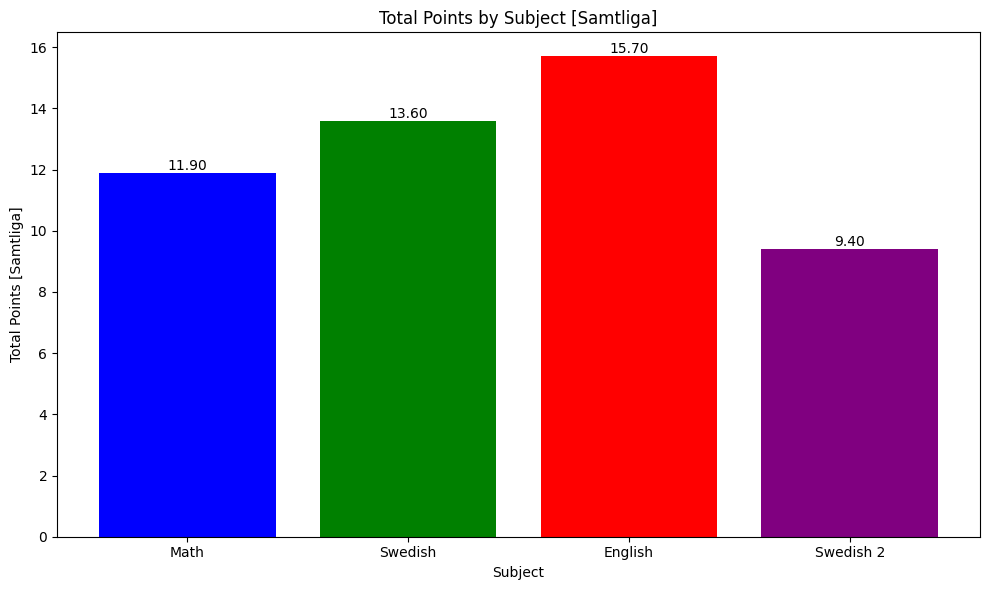

In [23]:

# Assuming 'Samtliga' corresponds to the first row after the header, which is indexed as 0
sam_row_index = 0

# Selecting the 'Samtliga' row for each subject
sam_math = df_math.iloc[sam_row_index]
sam_swedish = df_swedish.iloc[sam_row_index]
sam_english = df_english.iloc[sam_row_index]
sam_swedish2 = df_swedish2.iloc[sam_row_index]

# Assuming you want to show the 'Total (points)[mean]' for 'Samtliga' for each subject
total_points_sam = [
    sam_math['Total (points)[mean]'],
    sam_swedish['Total (points)[mean]'],
    sam_english['Total (points)[mean]'],
    sam_swedish2['Total (points)[mean]']
]

# Subjects array as before
subjects = ['Math', 'Swedish', 'English', 'Swedish 2']

# Create a bar chart using the 'Samtliga' data
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
bars = plt.bar(subjects, total_points_sam, color=['blue', 'green', 'red', 'purple'])

# Adding labels and title
plt.xlabel('Subject')
plt.ylabel('Total Points [Samtliga]')
plt.title('Total Points by Subject [Samtliga]')

# Optional: Add data labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [24]:
import plotly.express as px

# Data preparation
subjects = ['Math', 'Swedish', 'English', 'Swedish 2']  # Subjects
total_points_sam = [
    sam_math['Total (points)[mean]'],
    sam_swedish['Total (points)[mean]'],
    sam_english['Total (points)[mean]'],
    sam_swedish2['Total (points)[mean]']
]

# Create a DataFrame for Plotly
df_plot = pd.DataFrame({
    'Subject': subjects,
    'Total Points [Samtliga]': total_points_sam
})

# Create a bar chart
fig = px.bar(df_plot, x='Subject', y='Total Points [Samtliga]', color='Subject',
             title='Totala poäng av samtliga huvudmän indelat per ämne',
             labels={'Total Points [Samtliga]': 'Total Points'})

# Enhance the visualization
fig.update_layout(xaxis_title='Ämne',
                  yaxis_title='Totala Poäng',
                  showlegend=False)

# Show the figure
fig.show()


In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the layout of your subplots (2 rows, 2 columns)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Math', 'Swedish', 'English', 'Swedish 2')
)

# Add a bar chart to each subplot for a different subject

# Math
fig.add_trace(
    go.Bar(x=df_math['Principal'], y=df_math['Total (points)[mean]'], name='Math'),
    row=1, col=1
)

# Swedish
fig.add_trace(
    go.Bar(x=df_swedish['Principal'], y=df_swedish['Total (points)[mean]'], name='Swedish'),
    row=1, col=2
)

# English
fig.add_trace(
    go.Bar(x=df_english['Principal'], y=df_english['Total (points)[mean]'], name='English'),
    row=2, col=1
)

# Swedish 2
fig.add_trace(
    go.Bar(x=df_swedish2['Principal'], y=df_swedish2['Total (points)[mean]'], name='Swedish 2'),
    row=2, col=2
)

# Update layout if needed (optional)
fig.update_layout(
    title_text="Total Points by Subject for Different Principals",
    height=600,  # Height of the figure in pixels
    width=800,   # Width of the figure in pixels
)

# Show the plot
fig.show()


In [28]:
print(df_swedish.columns)



Index(['Place', 'Principal', 'Total (A-F)', 'Girls (A-F)', 'Boys (A-F)',
       'Total (A-E)[%]', 'Girls (A-E)[%]', 'Boys (A-E)[%]',
       'Total (points)[mean]', 'Girls (points)[mean]', 'Boys (points)[mean]'],
      dtype='object')
